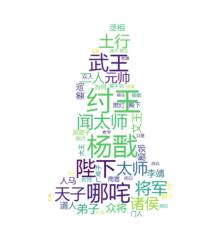

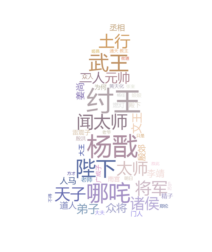

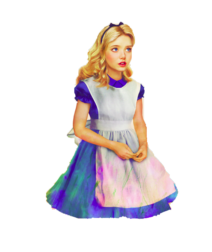

In [2]:
import jieba
jieba.enable_parallel(4)
# Setting up parallel processes :4 ,but unable to run on Windows
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import os
import imageio
# jieba.load_userdict("txt\userdict.txt")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

stopwords_path = d + '/wc_cn/stopwords_cn_en.txt'
# Chinese fonts must be set
font_path = d + '/fonts/msyh.ttf'

# the path to save worldcloud
imgname1 = d + '/封神演义.jpg'
imgname2 = d + '/封神演义_colored.jpg'
# read the mask / color image taken from
back_coloring = imageio.imread(path.join(d, d + '/resource/alice_color.png'))

# Read the whole text.
text = open(path.join(d, d + '/resource/封神演义.txt')).read()

# if you want use wordCloud,you need it
# add userdict by add_word()
userdict_list = ['']


# The function for processing text with Jieba
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            if myword == " 子牙" or myword == " 姜子牙":
                mywordlist.append("姜子牙")
            elif myword == " 飞虎" or myword == " 黄飞虎":
                mywordlist.append("黄飞虎")
            else:
                mywordlist.append(myword)
    return mywordlist
    
words = jieba_processing_txt(text)

wc = WordCloud(font_path=font_path, background_color="white", max_words=50, mask=back_coloring,
               max_font_size=100, random_state=42, width=1000, height=860, margin=2,)

wc.generate("".join(words))

# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname1))

# create coloring from image
image_colors_byImg = ImageColorGenerator(back_coloring)

# show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors_byImg), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(back_coloring, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname2))